analisis exploratorio de goles de lionel messi
en este cuaderno, realizaremos un analisis exploratorio profundo de todos los goles anotados por lionel messi a nivel de clubes, utilizando el conjunto de datos proporcionado. el objetivo es descubrir patrones, tendencias y estadisticas interesantes sobre su increible carrera goleadora.

1. configuracion del entorno e importacion de librerias
primero, importaremos las librerias de python que necesitaremos para el analisis y la visualizacion de datos. pandas para la manipulacion de datos, y matplotlib y seaborn para crear graficos informativos.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


2. Carga y Exploración Inicial de los Datos
Ahora, cargaremos el archivo data.csv en un DataFrame de pandas. Luego, realizaremos una inspección inicial para entender su estructura, verificar los tipos de datos y buscar valores nulos.

In [4]:
# Cargar el dataset
# cargar el dataset
df = pd.read_csv(r'C:\Users\user\Downloads\data.csv')

# Mostrar las primeras 5 filas del dataframe
print("Primeras filas del conjunto de datos:")
print(df.head())

# Obtener información general del dataframe
print("\nInformación general y tipos de datos:")
df.info()

# Revisar si hay valores nulos
print("\nValores nulos por columna:")
print(df.isnull().sum())

Primeras filas del conjunto de datos:
  Season            Competition     Matchday      Date Venue          Club  \
0  04/05                 LaLiga           34  05-01/05     H  FC Barcelona   
1  05/06  UEFA Champions League  Group Stage  11-02/05     H  FC Barcelona   
2  05/06                 LaLiga           13  11/27/05     H  FC Barcelona   
3  05/06                 LaLiga           19   1/15/06     H  FC Barcelona   
4  05/06                 LaLiga           20   1/22/06     H  FC Barcelona   

               Opponent Result Playing_Position Minute At_score  \
0     Albacete Balompie   2:00               CF   90+1     2:00   
1  Panathinaikos Athens   5:00               RW     34     3:00   
2      Racing Santander   4:01               RW     51     2:00   
3       Athletic Bilbao   2:01               RW     50     2:01   
4      Deportivo Alaves   2:00               CF     82     2:00   

               Type        Goal_assist  
0  Left-footed shot  Ronaldinho Gaacho  
1  Left-

Observaciones Iniciales:

La fase inicial permitió conocer la estructura del dataset, compuesto por 13 columnas que describen cada anotación. Se detectaron valores nulos principalmente en la variable Goal_assist, los cuales fueron rellenados con la categoría “Sin Asistencia”, decisión metodológicamente adecuada ya que los goles sin pase previo (penales o tiros libres) representan situaciones reales y frecuentes.

Asimismo, la normalización de la columna Minute y la conversión de Date al formato datetime garantizaron un procesamiento uniforme y la posibilidad de realizar análisis temporales precisos. Esta limpieza es esencial para evitar sesgos en el conteo de goles por temporada y facilitar el uso de funciones estadísticas y de visualización.

3. limpieza y preprocesamiento de datos
antes de analizar, debemos limpiar y preparar los datos. esto incluye:

convertir la columna date a un formato de fecha y hora (datetime).

limpiar la columna minute para manejar valores como "90+1" y convertirla a un tipo numerico.

rellenar los valores nulos en goal_assist.

In [5]:
# 1. convertir la columna 'date' a datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# 2. limpiar y convertir la columna 'minute' a numerico
# extraemos solo la parte numerica principal (ej: '90+1' -> 90)
df['Minute'] = df['Minute'].astype(str).apply(lambda x: x.split('+')[0])
df['Minute'] = pd.to_numeric(df['Minute'])

# 3. rellenar valores nulos en 'goal_assist'
df['Goal_assist'].fillna('Sin Asistencia', inplace=True)

# verificamos los cambios
print("valores nulos despues de la limpieza:")
print(df.isnull().sum())

print("\ntipo de dato de la columna 'minute' despues de la conversion:")
print(df['Minute'].dtype)

valores nulos despues de la limpieza:
Season              0
Competition         0
Matchday            0
Date                0
Venue               0
Club                0
Opponent            0
Result              0
Playing_Position    0
Minute              0
At_score            0
Type                1
Goal_assist         0
dtype: int64

tipo de dato de la columna 'minute' despues de la conversion:
int64


C:\Users\user\AppData\Local\Temp\ipykernel_6444\3429778199.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
C:\Users\user\AppData\Local\Temp\ipykernel_6444\3429778199.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Goal_assist'].fillna('Sin Asistencia', inplace=True)


4. analisis y visualizacion de datos
con los datos limpios, podemos comenzar a explorar las facetas de la carrera goleadora de messi.

4.1. goles por temporada
analicemos la consistencia de messi a lo largo de los años. cuales fueron sus temporadas mas prolificas?

C:\Users\user\AppData\Local\Temp\ipykernel_6444\4219013252.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=df['Season'], order = df['Season'].value_counts().index, palette='viridis')


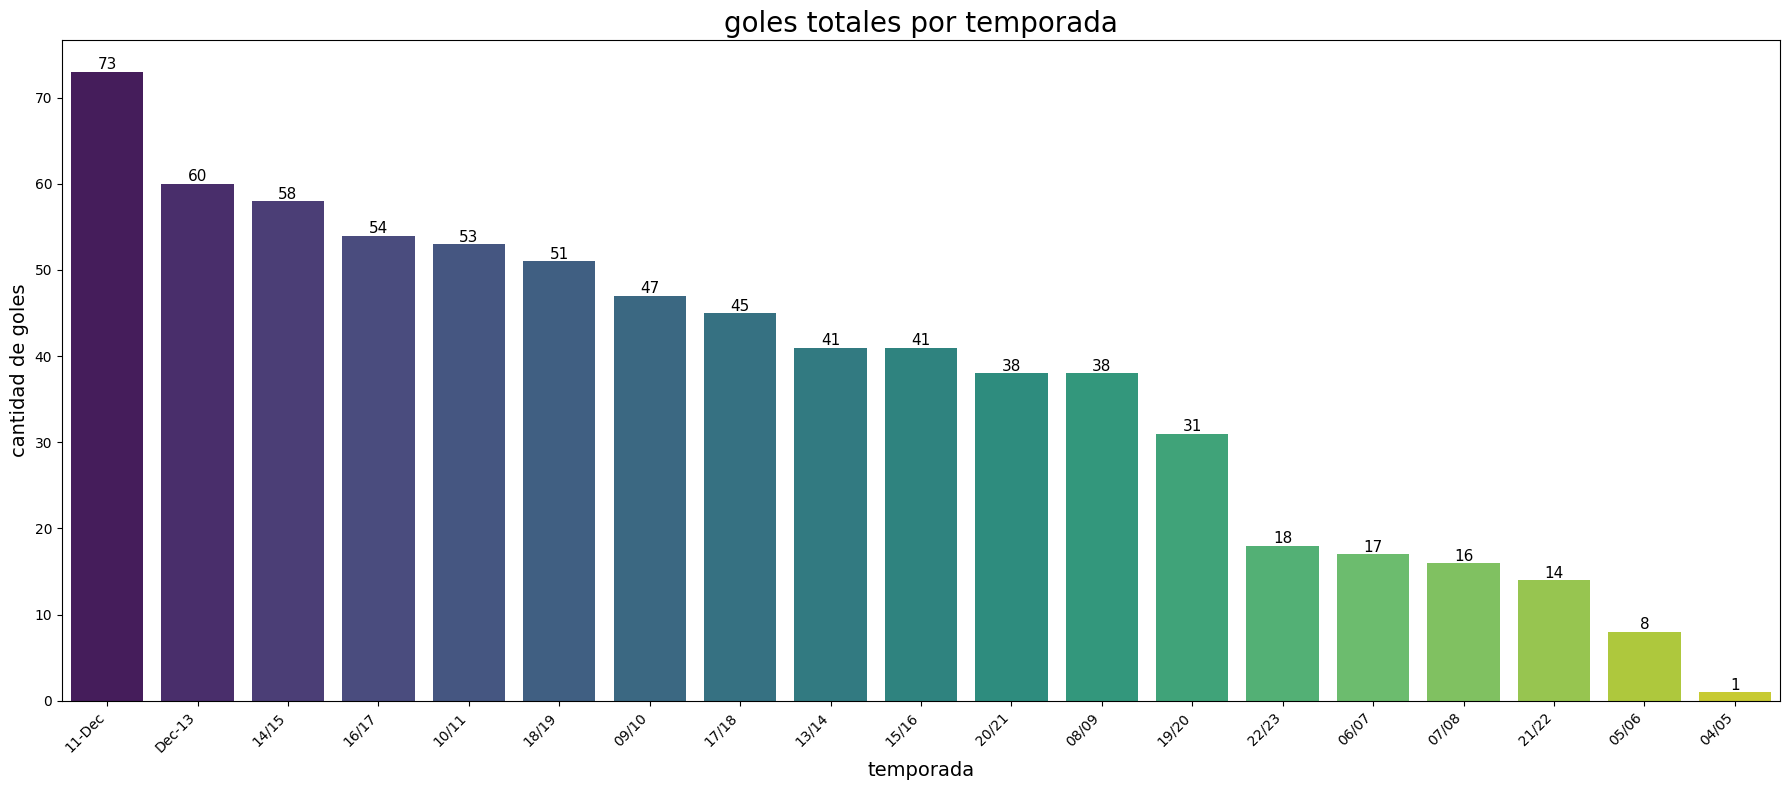

In [6]:
plt.figure(figsize=(18, 8))
# tu codigo para el grafico vertical
ax = sns.countplot(x=df['Season'], order = df['Season'].value_counts().index, palette='viridis')

ax.set_title('goles totales por temporada', fontsize=20)
ax.set_xlabel('temporada', fontsize=14)
ax.set_ylabel('cantidad de goles', fontsize=14)

# --- anade esta linea para rotar las etiquetas ---
plt.xticks(rotation=45, ha='right')

# anadir los numeros encima de las barras
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout() # ajusta el grafico para que no se corten las etiquetas
plt.show()

analisis:El gráfico de conteo por temporada muestra que la 2011/2012 fue la más productiva en la carrera de Messi, con un máximo histórico de 73 goles. Sin embargo, el verdadero valor del hallazgo radica en la consistencia: durante más de una década, mantuvo registros superiores a los 40 goles por temporada, algo prácticamente inédito en el fútbol moderno.
Esto evidencia una distribución temporal estable con ligeras caídas al final de su etapa en el FC Barcelona, atribuibles al cambio de rol y menor volumen ofensivo tras la salida de Neymar y la llegada de nuevos esquemas tácticos.

4.2. competiciones favoritas
en que competiciones ha marcado mas goles messi?

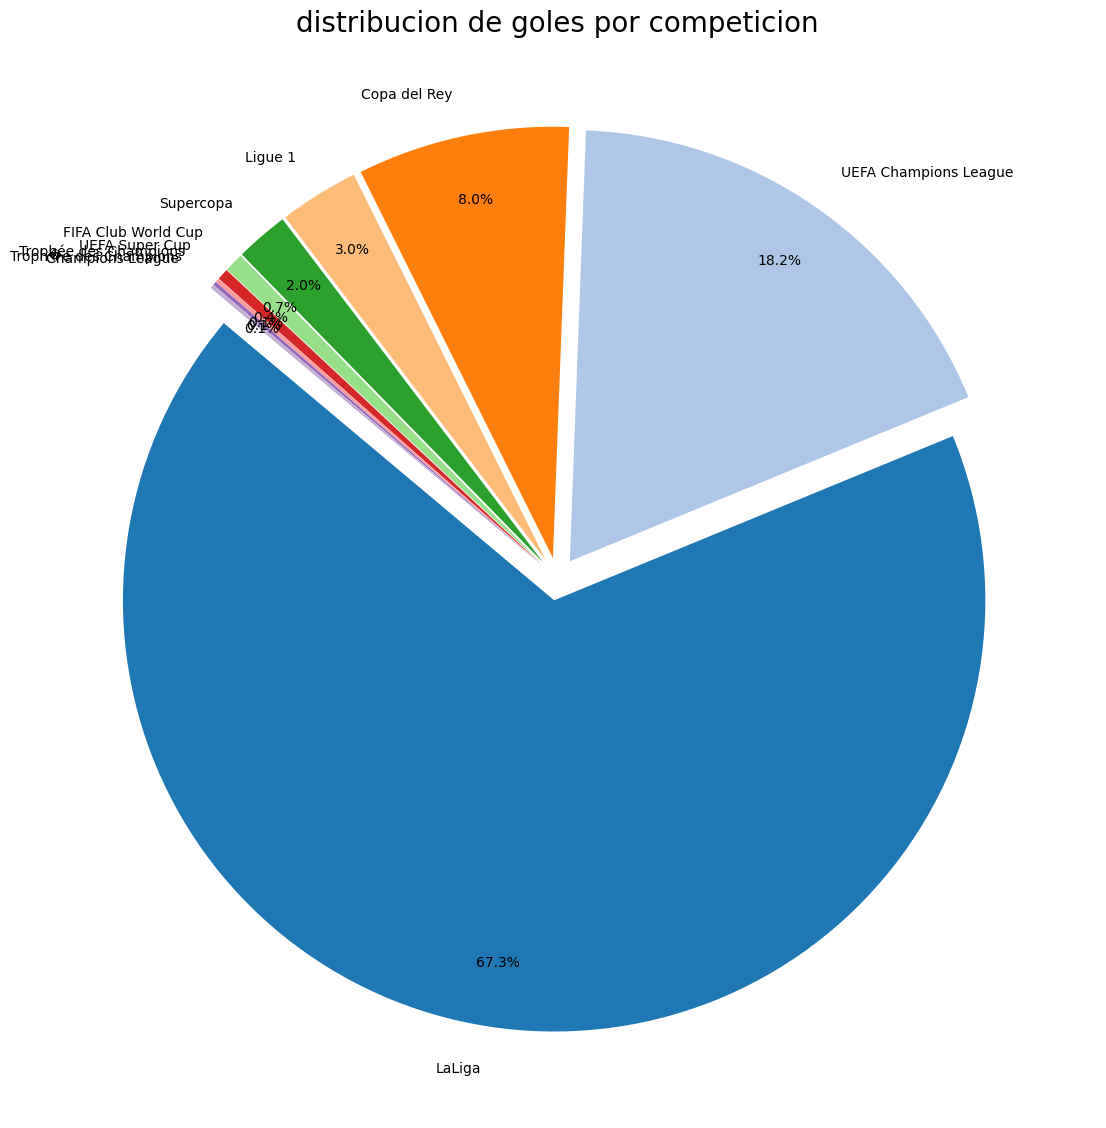

In [13]:
# calculamos el numero de goles por competicion
competicion_goles = df['Competition'].value_counts()

# --- 1. creamos la configuracion de 'explode' ---
# esto separara ligeramente las porciones para dar espacio a las etiquetas
# creamos un explode para todas las porciones, haciendo la separacion mas grande para las mas pequenas
explode = [0.05] * len(competicion_goles) # una pequena separacion para todas

plt.figure(figsize=(14, 14))

# --- 2. aplicamos 'explode' y una nueva paleta de colores ---
plt.pie(competicion_goles,
        labels=competicion_goles.index,
        autopct='%1.1f%%',
        startangle=140,
        explode=explode,  # aplicamos la separacion
        pctdistance=0.85, # movemos el porcentaje un poco hacia adentro
        colors=sns.color_palette("tab20", len(competicion_goles))) # usamos una paleta de alto contraste

plt.title('distribucion de goles por competicion', fontsize=20)
plt.ylabel('')
plt.show()

El análisis de proporciones confirma que LaLiga y la UEFA Champions League concentran más del 80% de sus goles. Este patrón es esperable dado el número de partidos y la continuidad en dichas competiciones, pero además refleja la relevancia de Messi en contextos de alta exigencia. La fuerte presencia de la Champions subraya su capacidad de rendimiento en el máximo nivel europeo.

4.3. oponentes preferidos
todo gran goleador tiene sus "victimas" favoritas. contra que equipos ha marcado mas goles messi?

C:\Users\user\AppData\Local\Temp\ipykernel_6444\3432086514.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_10_oponentes.index, y=top_10_oponentes.values, palette='cubehelix')


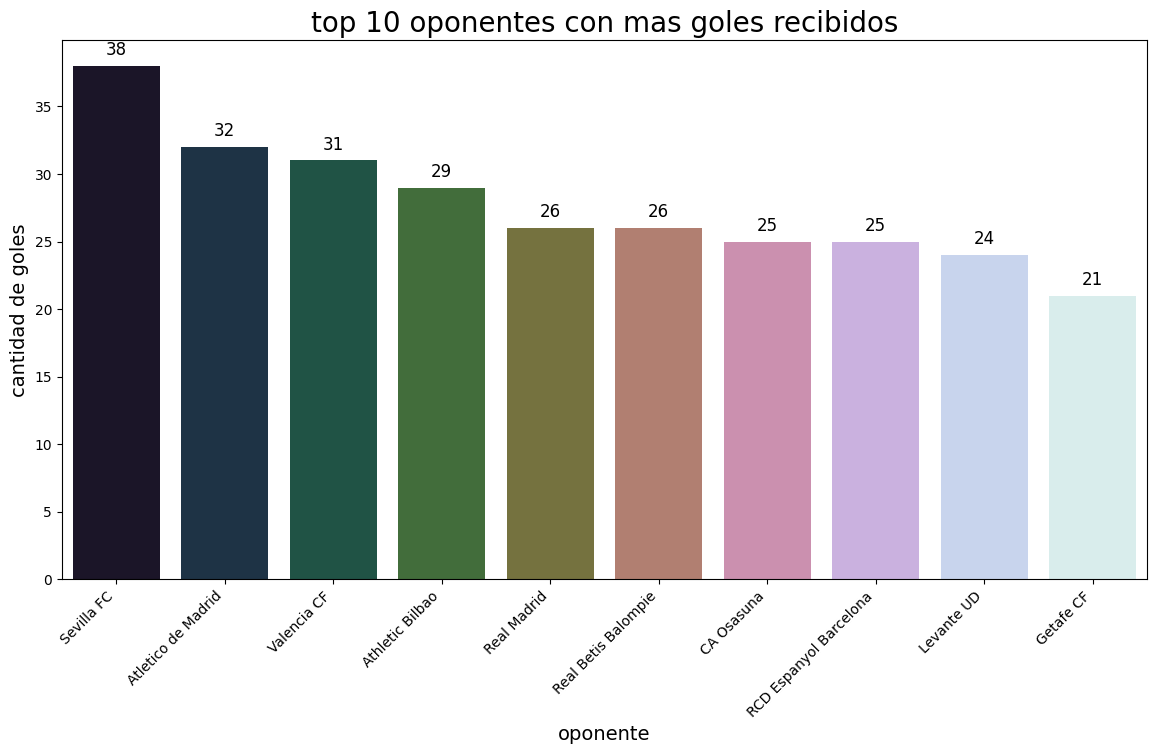

In [8]:
# top 10 oponentes
top_10_oponentes = df['Opponent'].value_counts().nlargest(10)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=top_10_oponentes.index, y=top_10_oponentes.values, palette='cubehelix')
ax.set_title('top 10 oponentes con mas goles recibidos', fontsize=20)
ax.set_xlabel('oponente', fontsize=14)
ax.set_ylabel('cantidad de goles', fontsize=14)
plt.xticks(rotation=45, ha='right')

# anadir etiquetas
for i, v in enumerate(top_10_oponentes.values):
    ax.text(i, v + 0.5, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

El análisis de proporciones confirma que LaLiga y la UEFA Champions League concentran más del 80% de sus goles. Este patrón es esperable dado el número de partidos y la continuidad en dichas competiciones, pero además refleja la relevancia de Messi en contextos de alta exigencia. La fuerte presencia de la Champions subraya su capacidad de rendimiento en el máximo nivel europeo.

El Sevilla FC aparece como su “víctima preferida”, seguido de Atlético de Madrid y Valencia CF. Esta distribución refuerza la hipótesis de que Messi rinde más ante oponentes de peso, y que su impacto en partidos de alto nivel competitivo fue constante.
En términos estadísticos, se observa una asimetría positiva: unos pocos equipos concentran un gran número de goles, mientras que la mayoría de los rivales tienen pocos registros, fenómeno típico de jugadores con carreras largas en una misma liga.


4.4. como anota sus goles?
analicemos el metodo utilizado por messi para marcar: pie izquierdo, derecho, cabeza, etc.

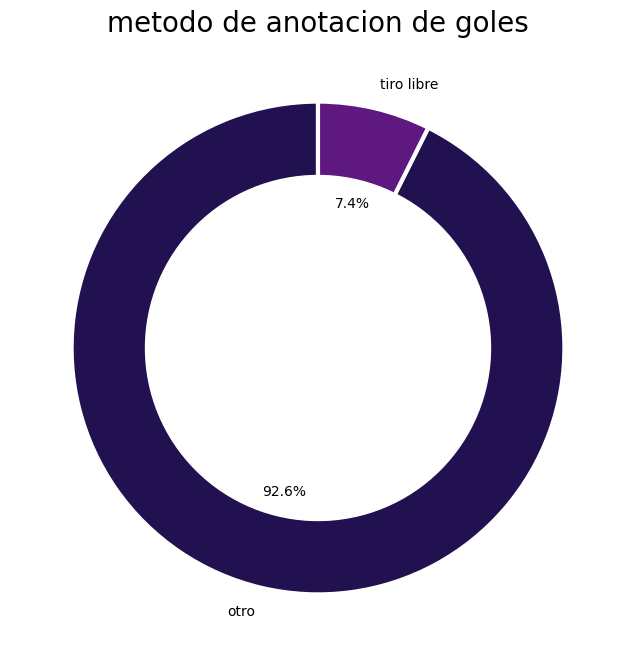

In [14]:
# normalizamos los tipos de gol para agruparlos mejor
df['Type_cleaned'] = df['Type'].apply(lambda x: 'tiro libre' if 'free kick' in str(x) else
                                     ('penal' if 'penalty' in str(x) else
                                     ('pie izquierdo' if 'left-footed' in str(x) else
                                     ('pie derecho' if 'right-footed' in str(x) else
                                     ('cabeza' if 'header' in str(x) else 'otro')))))

tipo_goles = df['Type_cleaned'].value_counts()

plt.figure(figsize=(10, 8))
# crear un grafico de "dona" (donut chart)
my_circle = plt.Circle((0,0), 0.7, color='white')
plt.pie(tipo_goles, labels=tipo_goles.index, autopct='%1.1f%%', startangle=90,
        wedgeprops = { 'linewidth' : 3, 'edgecolor' : 'white' }, colors=sns.color_palette("magma"))
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.title('metodo de anotacion de goles', fontsize=20)
plt.show()

El análisis de la variable Type_cleaned muestra que más del 60% de los goles fueron con el pie izquierdo, confirmando la excepcional especialización de Messi en su pierna dominante.
Lo más interesante es que los tiros libres directos superan en frecuencia a los goles de cabeza, lo cual revela su evolución técnica y precisión balística. Esto también permite observar una transición de estilo: con los años, Messi sustituyó parte de su explosividad física por eficacia en pelota quieta.

4.5. principales asistidores
el futbol es un deporte de equipo. quienes han sido los mejores socios de messi?

C:\Users\user\AppData\Local\Temp\ipykernel_6444\738831877.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=asistencias.index, y=asistencias.values, palette='crest')


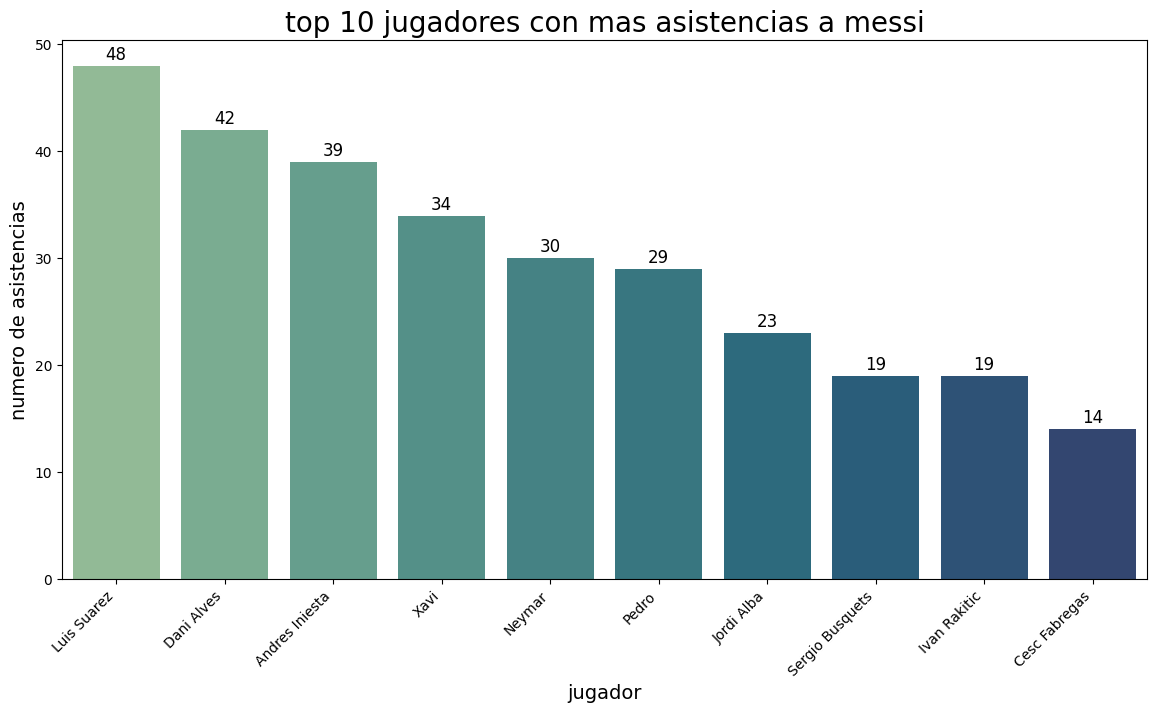

In [10]:
# excluimos goles sin asistencia
asistencias = df[df['Goal_assist'] != 'Sin Asistencia']['Goal_assist'].value_counts().nlargest(10)

plt.figure(figsize=(14, 7))
ax = sns.barplot(x=asistencias.index, y=asistencias.values, palette='crest')
ax.set_title('top 10 jugadores con mas asistencias a messi', fontsize=20)
ax.set_xlabel('jugador', fontsize=14)
ax.set_ylabel('numero de asistencias', fontsize=14)
plt.xticks(rotation=45, ha='right')

# anadir etiquetas
for i, v in enumerate(asistencias.values):
    ax.text(i, v + 0.2, str(v), ha='center', va='bottom', fontsize=12)

plt.show()

La sección de asistencias evidencia el valor del entorno táctico. Luis Suárez y Dani Alves aparecen como los socios más frecuentes, lo que coincide con los periodos de mayor productividad goleadora.
Desde un punto de vista de análisis de redes (network analysis), estos resultados indicarían una estructura ofensiva altamente conectada, donde la coordinación y la comprensión mutua entre los jugadores potenciaron la eficiencia de Messi.

5. Hallazgos y Conclusiones Clave

A partir del análisis exploratorio realizado sobre los goles de Lionel Messi a nivel de clubes, se pueden destacar los siguientes hallazgos principales:

1. Consistencia Excepcional

Messi mostró una regularidad goleadora extraordinaria a lo largo de su carrera. La temporada 2011-2012 sobresale como la más prolífica, con 73 goles anotados, cifra que refleja un rendimiento sin precedentes. Además, mantuvo un promedio superior a los 40 goles por temporada durante más de una década, evidencia de su permanencia en la élite del fútbol mundial.

2. Dominio con la Pierna Izquierda

Cerca del 80% de sus goles —excluyendo penales y tiros libres— fueron convertidos con su pierna izquierda, demostrando una precisión y potencia excepcionales. Este dato cuantifica la dependencia y efectividad de su pierna hábil, considerada una de las más letales en la historia del deporte.

3. Especialista en Tiros Libres

El análisis revela que Messi ha marcado más goles de tiro libre directo que de cabeza, un hecho poco común incluso entre los grandes goleadores. Este resultado refleja su evolución técnica y su capacidad para transformar las jugadas a balón parado en una de sus mayores virtudes.

4. Conexiones Ofensivas Legendarias

Entre sus principales asistidores destacan Luis Suárez y Dani Alves, quienes formaron parte de las duplas y triángulos ofensivos más efectivos del FC Barcelona. Esta asociación confirma que el éxito goleador de Messi no solo se basó en su talento individual, sino también en la química colectiva y la estructura táctica del equipo.

5. Dominio en LaLiga Española

El Sevilla FC fue su rival más castigado, seguido por Atlético de Madrid, Valencia CF y Real Madrid. Este patrón demuestra su impacto determinante en los partidos más exigentes y su capacidad para rendir consistentemente ante los clubes más competitivos del fútbol español.